In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np # linear algebra
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold, train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_score, confusion_matrix


from sklearn import tree

In [ ]:
#Data Analysis

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Ecology/water_potability.csv")

In [4]:
# Let's take a quick look at the first 5 lines
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [5]:
# Descriptive Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


In [6]:
# Information about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
#Dependent Variable Analysis

In [7]:
potability = pd.DataFrame(df["Potability"].value_counts())

fig = px.pie(data_frame=potability, names=["Not Potable", "Potable"], values="Potability", hole=0.35, opacity=0.8, labels={"label": "Potability", "Potability": "Number of Samples"})
fig.update_layout(title=dict(text="Pie Chart of Potability Feature"))
fig.update_traces(textposition="outside", textinfo="percent+label")
fig.show()

In [8]:
# Check the correlation table
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


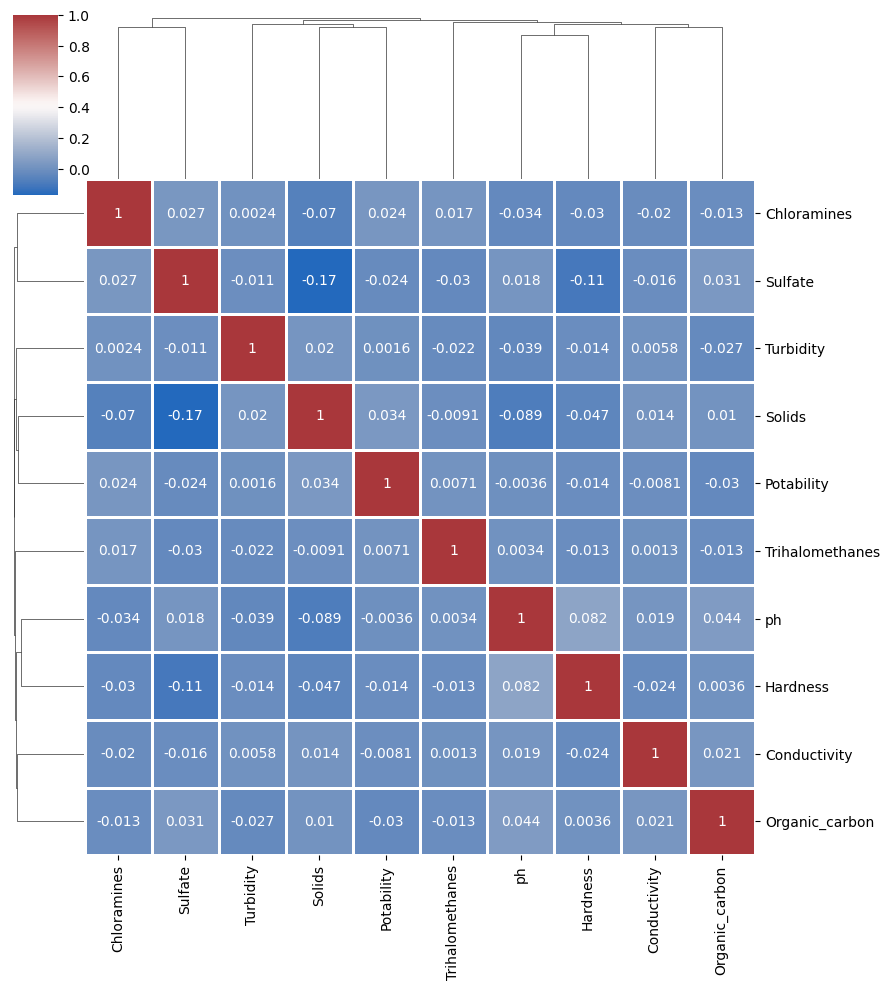

In [9]:
# Check the correlation by using clustermap
sns.clustermap(df.corr(), cmap="vlag", dendrogram_ratio=(0.1, 0.2), annot=True, linewidths=.8, figsize=(9, 10))
plt.show()

In [ ]:
#Distribution of Features

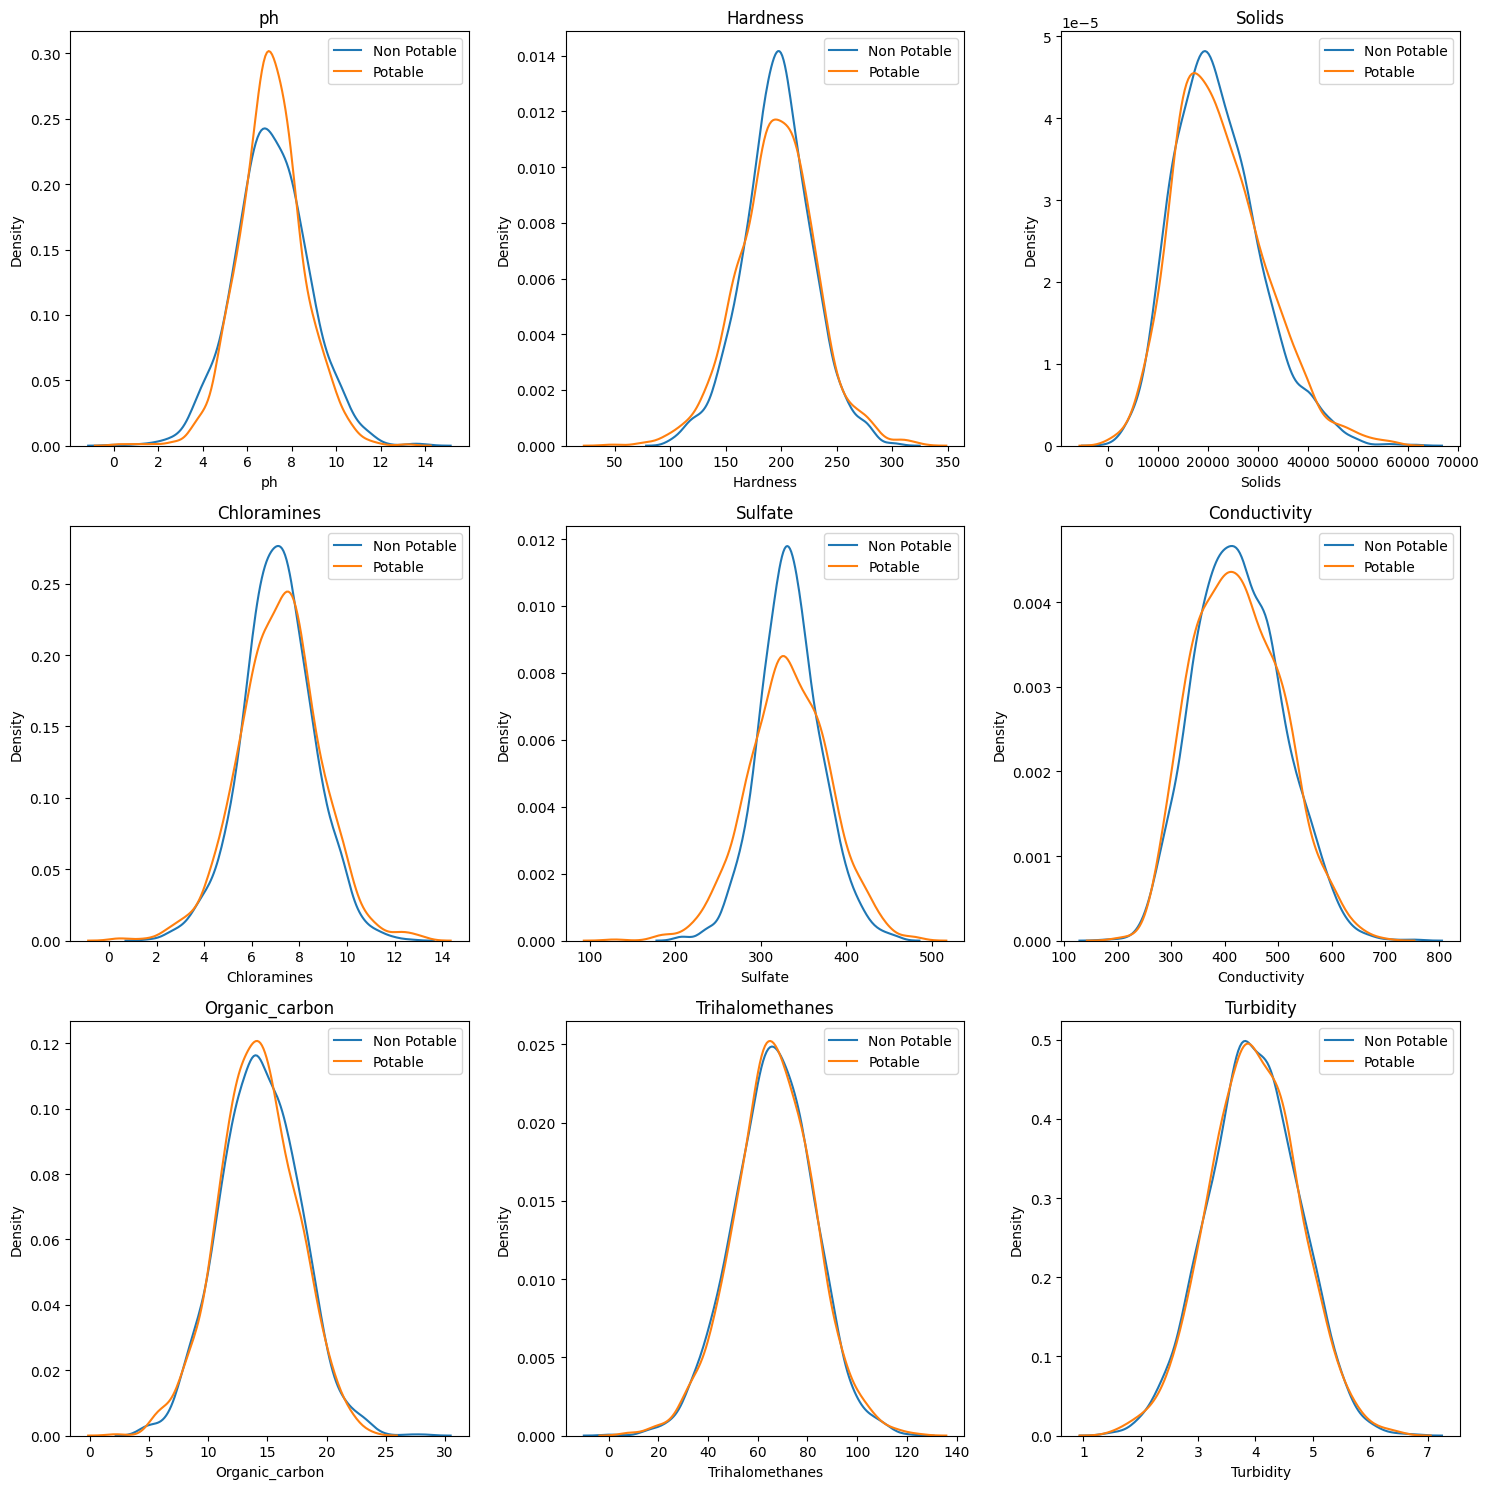

In [10]:
non_potable = df.query("Potability == 0")
potable = df.query("Potability == 1")

plt.figure(figsize=(15,15))

for row, col in enumerate(df.columns[: 9]):
    # df.columns[: 9] because the 10th column is also "Potability"
    plt.subplot(3, 3, row + 1)
    plt.title(col)
    sns.kdeplot(x=non_potable[col], label="Non Potable")
    sns.kdeplot(x=potable[col], label="Potable")
    plt.legend()

plt.tight_layout()

In [ ]:
#Pre-processing; Missing Value

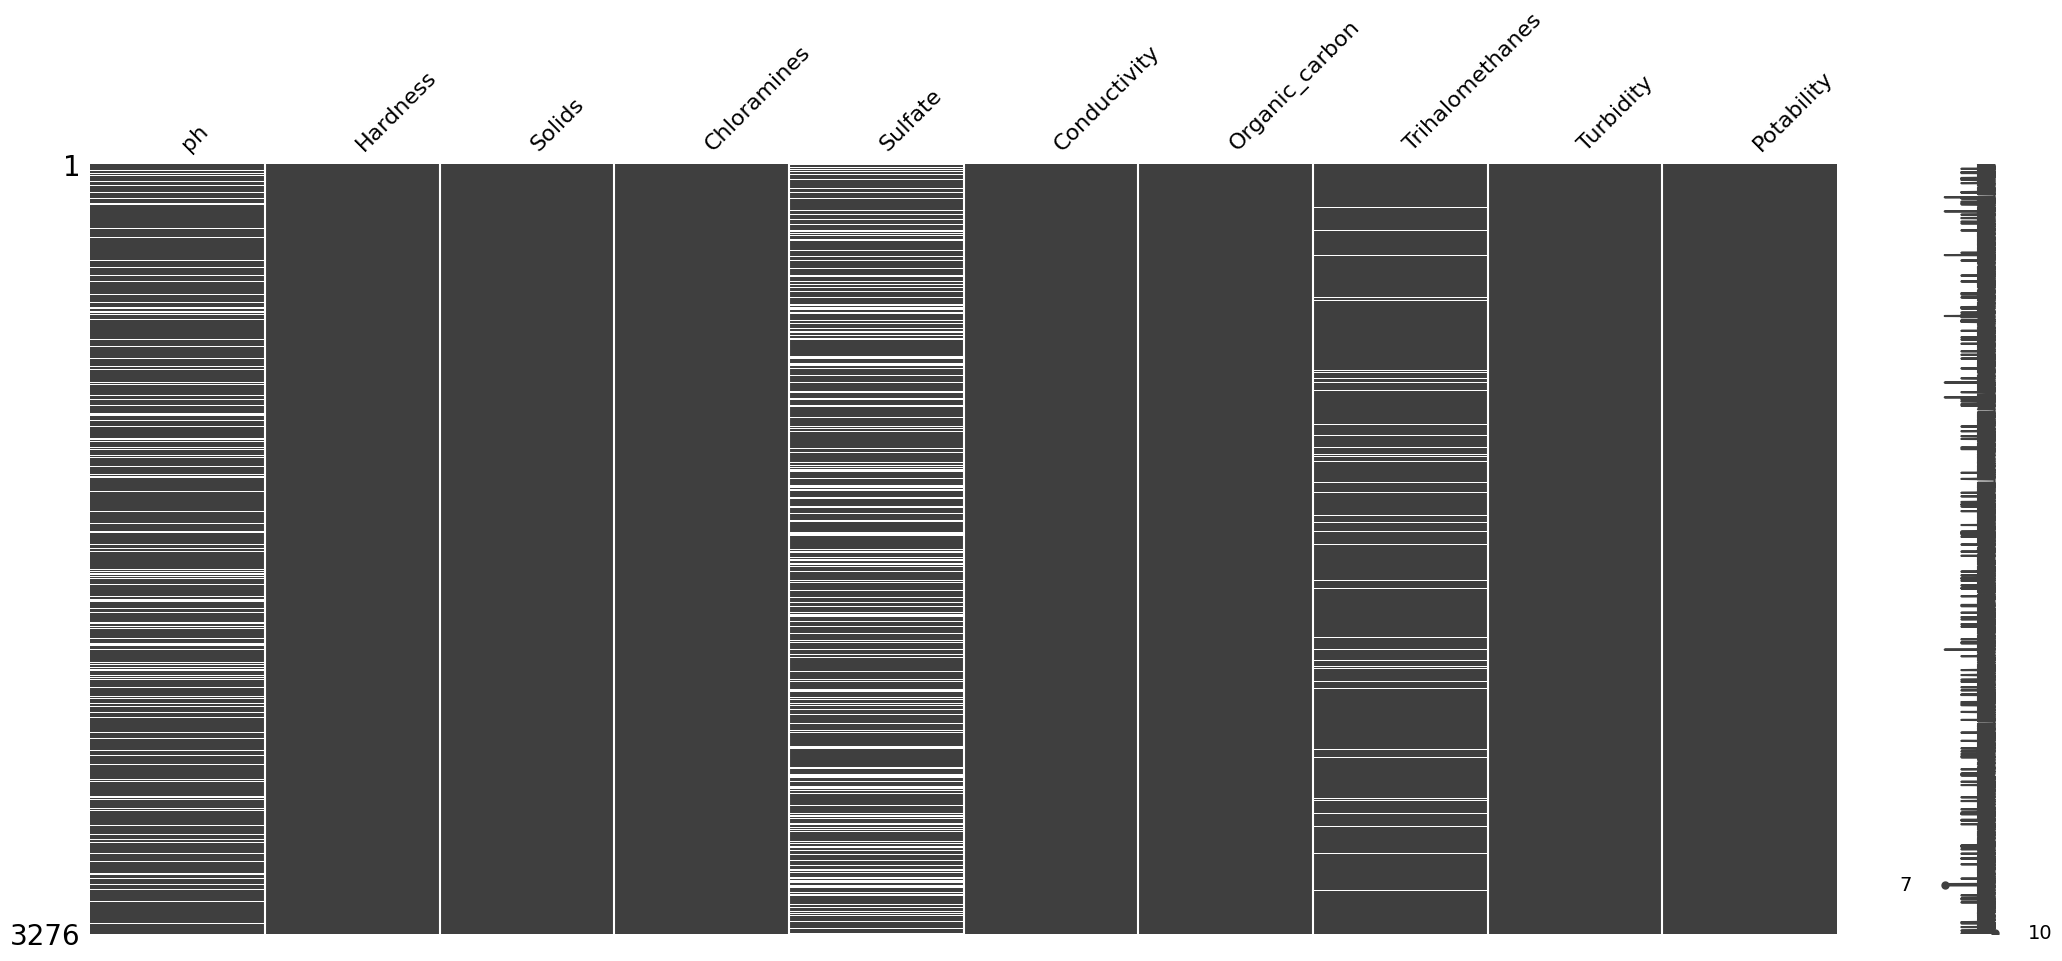

In [11]:
# Check missing values by using msno.matrix()
msno.matrix(df)
plt.show()

In [12]:
# Check missing value counts
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [13]:
# Check median and mean values for missing value features
for col in ["ph", "Sulfate", "Trihalomethanes"]:
    print(f"{col} median value is: {df[col].median()}")
    print(f"{col} mean value is: {df[col].mean()}\n")

ph median value is: 7.036752103833548
ph mean value is: 7.080794504276835

Sulfate median value is: 333.073545745888
Sulfate mean value is: 333.7757766108135

Trihalomethanes median value is: 66.62248509808484
Trihalomethanes mean value is: 66.39629294676803



In [14]:
# Handling missing value with average of features
for col in ["ph", "Sulfate", "Trihalomethanes"]:
    df[col].fillna(value=df[col].mean(), inplace=True)

In [15]:
# Check again the missing values
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [ ]:
#Train-Test Split

In [16]:
X = df.drop("Potability", axis=1).values
y = df["Potability"].values

In [17]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

X_train (2293, 9)
X_test (983, 9)
y_train (2293,)
y_test (983,)


In [ ]:
#Data Modelling

In [18]:
models = [("Decision Tree Classifier", DecisionTreeClassifier(max_depth=3)),
         ("Random Forest Classifier", RandomForestClassifier())]

# Used max_depth=3, because visualization is getting hard more than 3 in Decision Tree Classifier


In [19]:
final_results = []
confusion_matrix_list = []

for name, model in models:
    model.fit(X_train, y_train) # train
    model_result = model.predict(X_test) # prediction
    score = precision_score(y_test, model_result)
    cm = confusion_matrix(y_test, model_result)

    final_results.append((name, score))
    confusion_matrix_list.append((name, cm))

In [20]:
# Check precision_score list
final_results

[('Decision Tree Classifier', 0.5652173913043478),
 ('Random Forest Classifier', 0.6313131313131313)]

In [21]:
# Check confusion_matrix_list list
confusion_matrix_list

[('Decision Tree Classifier',
  array([[515,  80],
         [284, 104]])),
 ('Random Forest Classifier',
  array([[522,  73],
         [263, 125]]))]

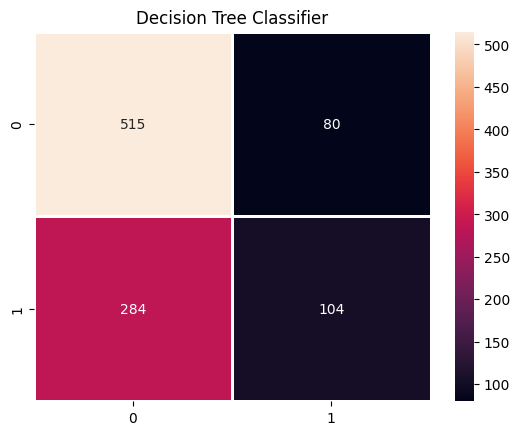

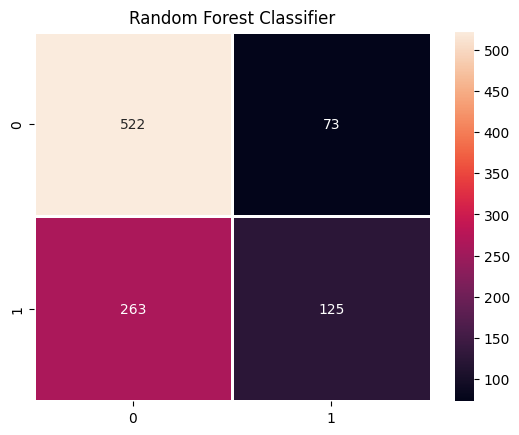

In [22]:
# Visualization of Confusion Matrix for our prediction
for name, i in confusion_matrix_list:
    plt.figure()
    sns.heatmap(data=i, annot=True, linewidths=0.8, fmt=".0f")
    plt.title(name)
    plt.show()

In [ ]:
#Descisoin tree 1

In [23]:
df_clf = models[0][1]
df_clf

DecisionTreeClassifier(max_depth=3)

In [24]:
# tree.plot_tree() has "feature_names" parameter. This parameter uses a list
df.columns.tolist()[:-1] # Without dependent variable

['ph',
 'Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Conductivity',
 'Organic_carbon',
 'Trihalomethanes',
 'Turbidity']

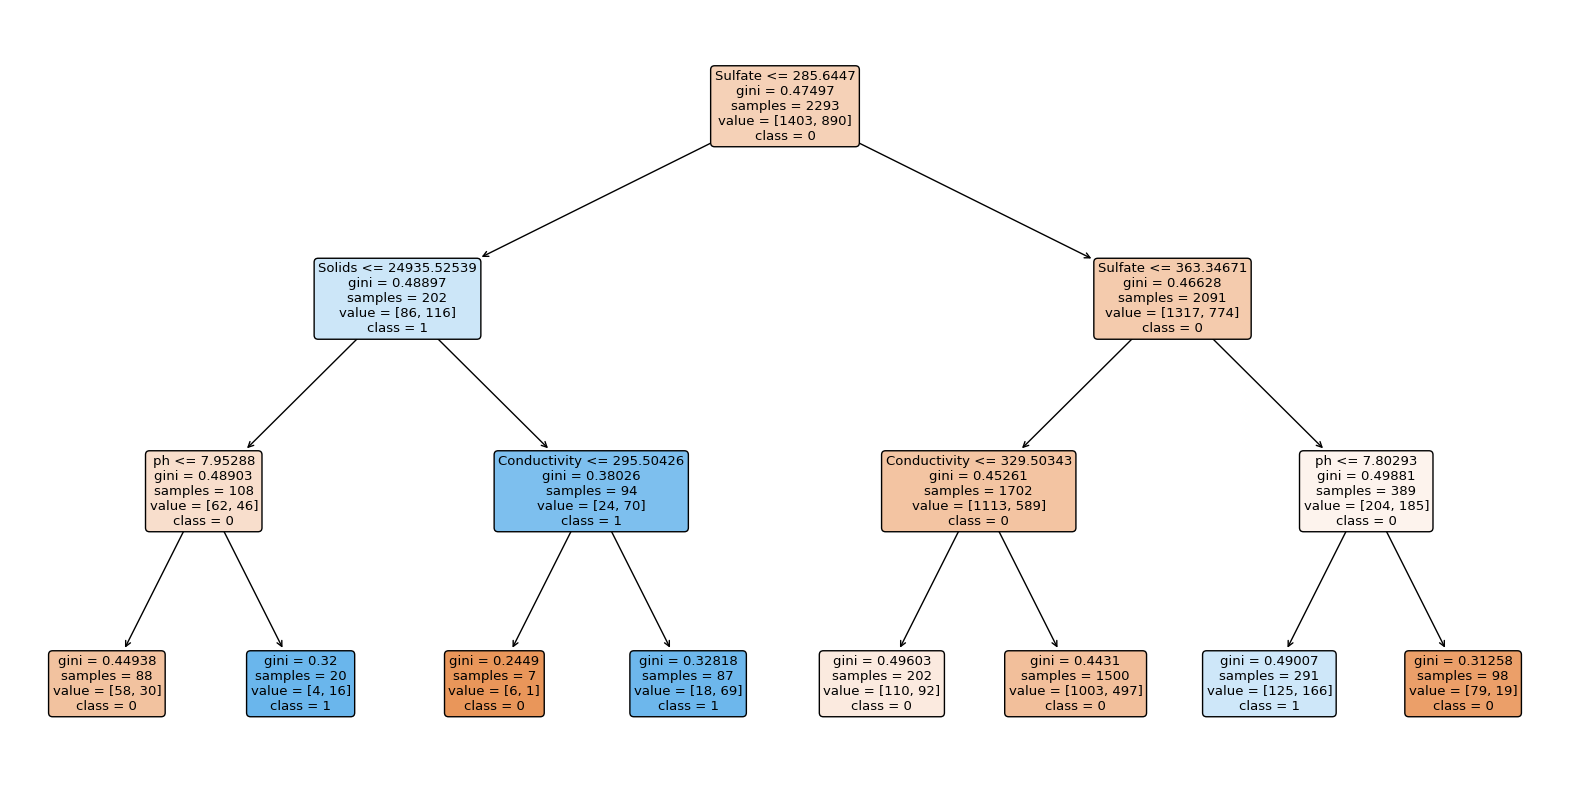

In [25]:
plt.figure(figsize=(20,10))

tree.plot_tree(decision_tree=df_clf,
              feature_names=df.columns.tolist()[:-1],
              class_names=["0", "1"],
              filled=True,
              rounded=True,
              precision=5)

plt.show()

In [ ]:
#Random Forest Classifier and Hyperparameter Tuning

In [26]:
model_params = {
    "Random Forest":
    {
        "model": RandomForestClassifier(),
        "params":
        {
            "n_estimators": [10, 50, 100],
            "max_features": ["sqrt", "log2"],
            "max_depth": list(range(1, 21, 3))
        }
    }
}

model_params

{'Random Forest': {'model': RandomForestClassifier(),
  'params': {'n_estimators': [10, 50, 100],
   'max_features': ['sqrt', 'log2'],
   'max_depth': [1, 4, 7, 10, 13, 16, 19]}}}

In [27]:
# Cross Validation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2)

scores = []

for model_name, params in model_params.items():
    rs = RandomizedSearchCV(params["model"], params["params"], cv=cv, n_iter=10)
    rs.fit(X, y)
    scores.append([model_name, dict(rs.best_params_), rs.best_score_])

scores

[['Random Forest',
  {'n_estimators': 100, 'max_features': 'log2', 'max_depth': 19},
  0.6756698007819774]]

In [ ]:
#Re-Modelling

In [28]:
# Defining best parameters and modelling again
best_params = {'n_estimators': 100, 'max_features': 'log2', 'max_depth': 16}

new_model = RandomForestClassifier(**best_params)

In [29]:
new_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=16, max_features='log2')

In [30]:
new_model_result = new_model.predict(X_test)
new_score = precision_score(y_test, new_model_result)

print("New Precision Score: ", new_score)

New Precision Score:  0.6210526315789474


In [ ]:
#Decision Tree: 2

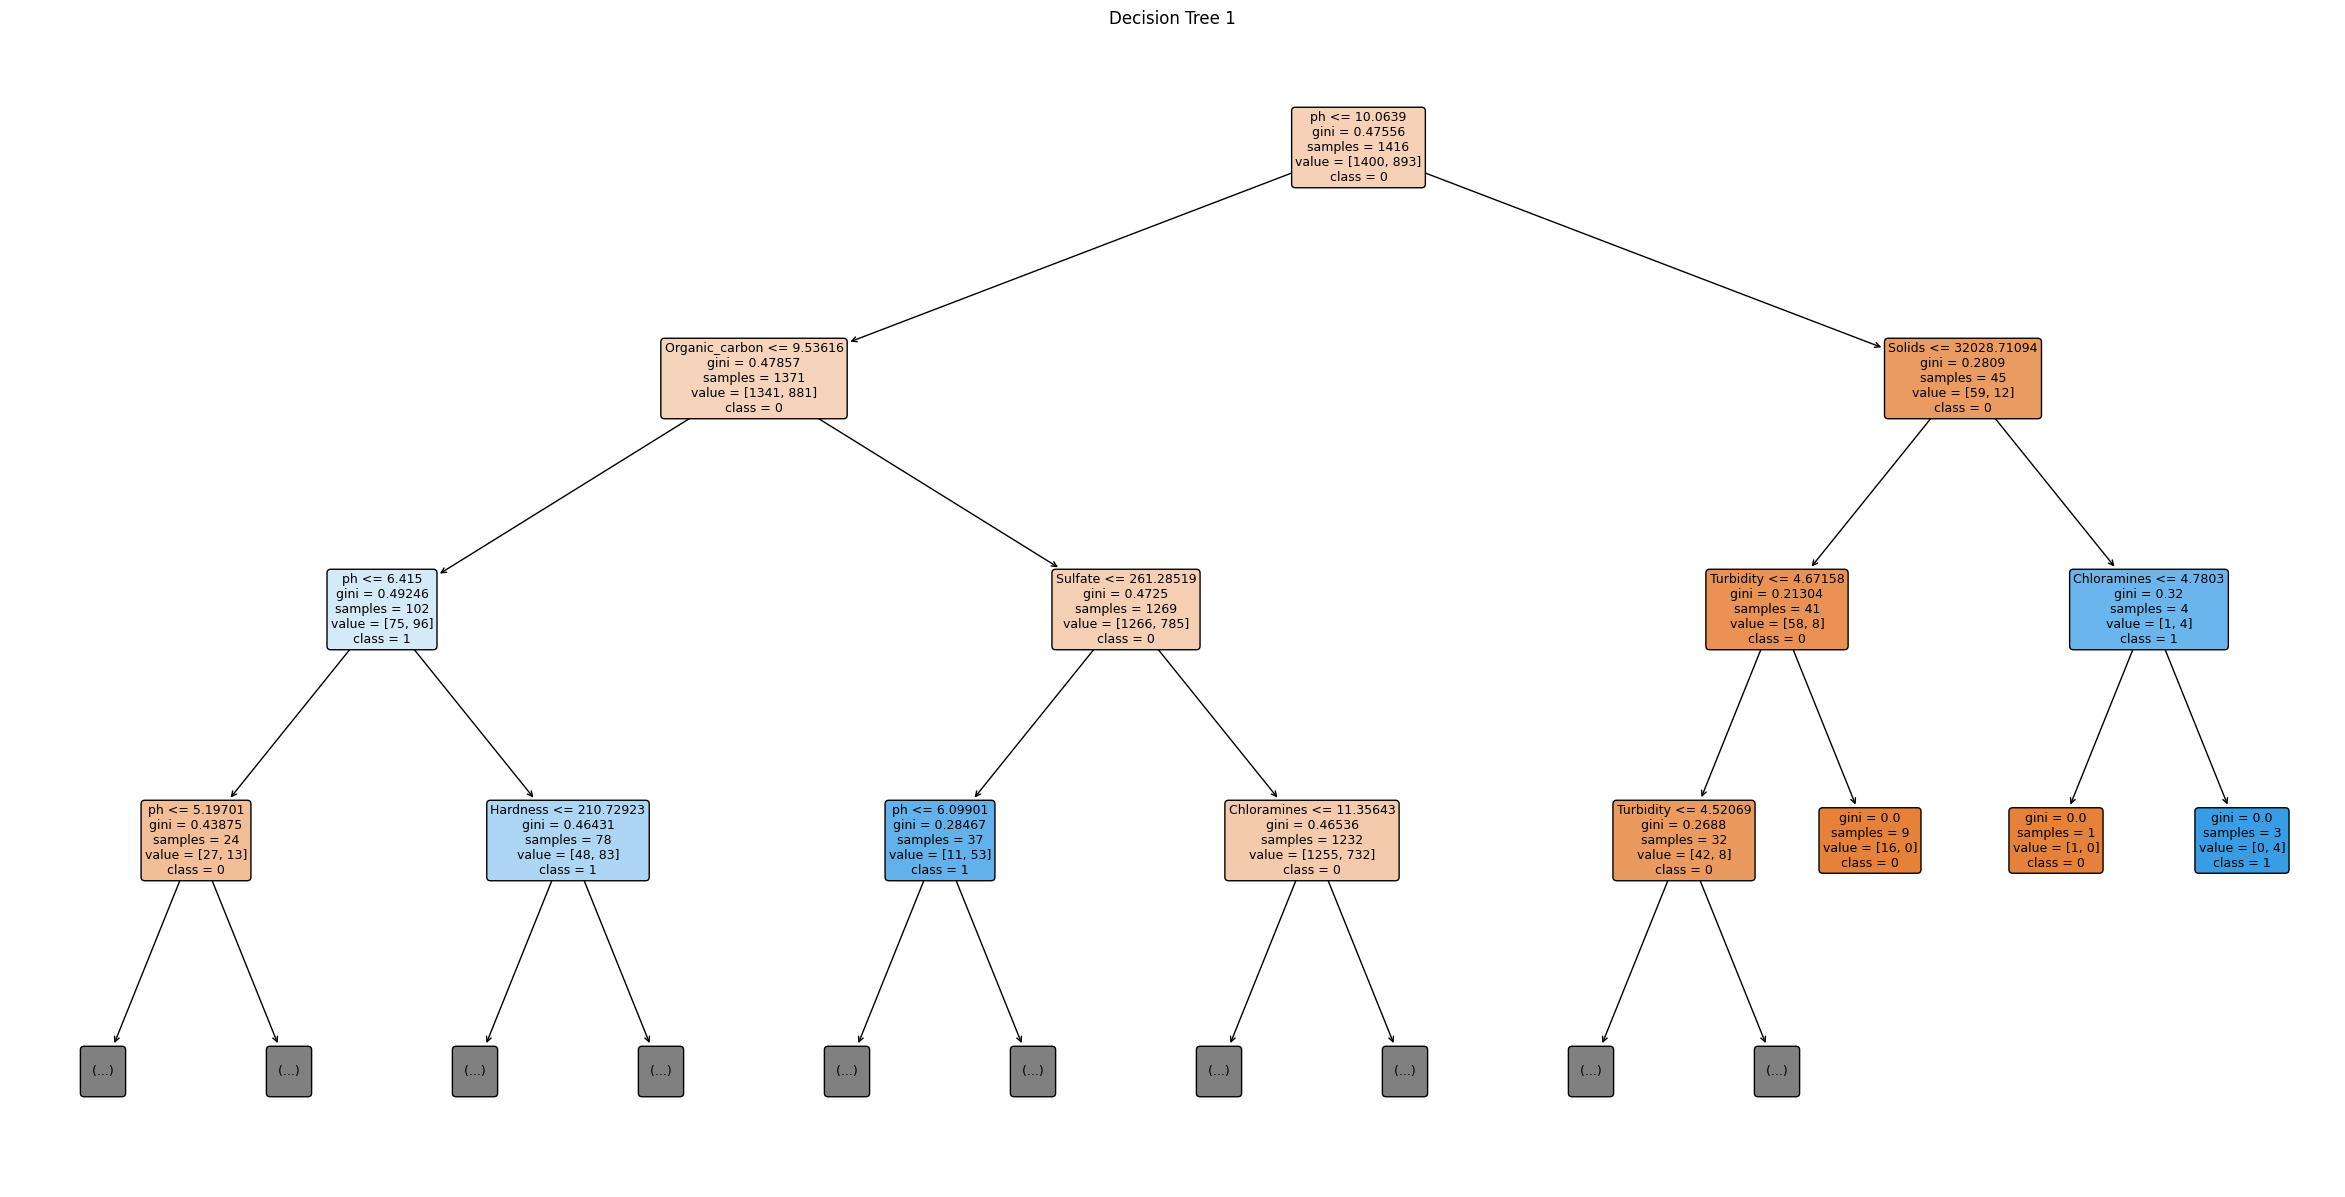

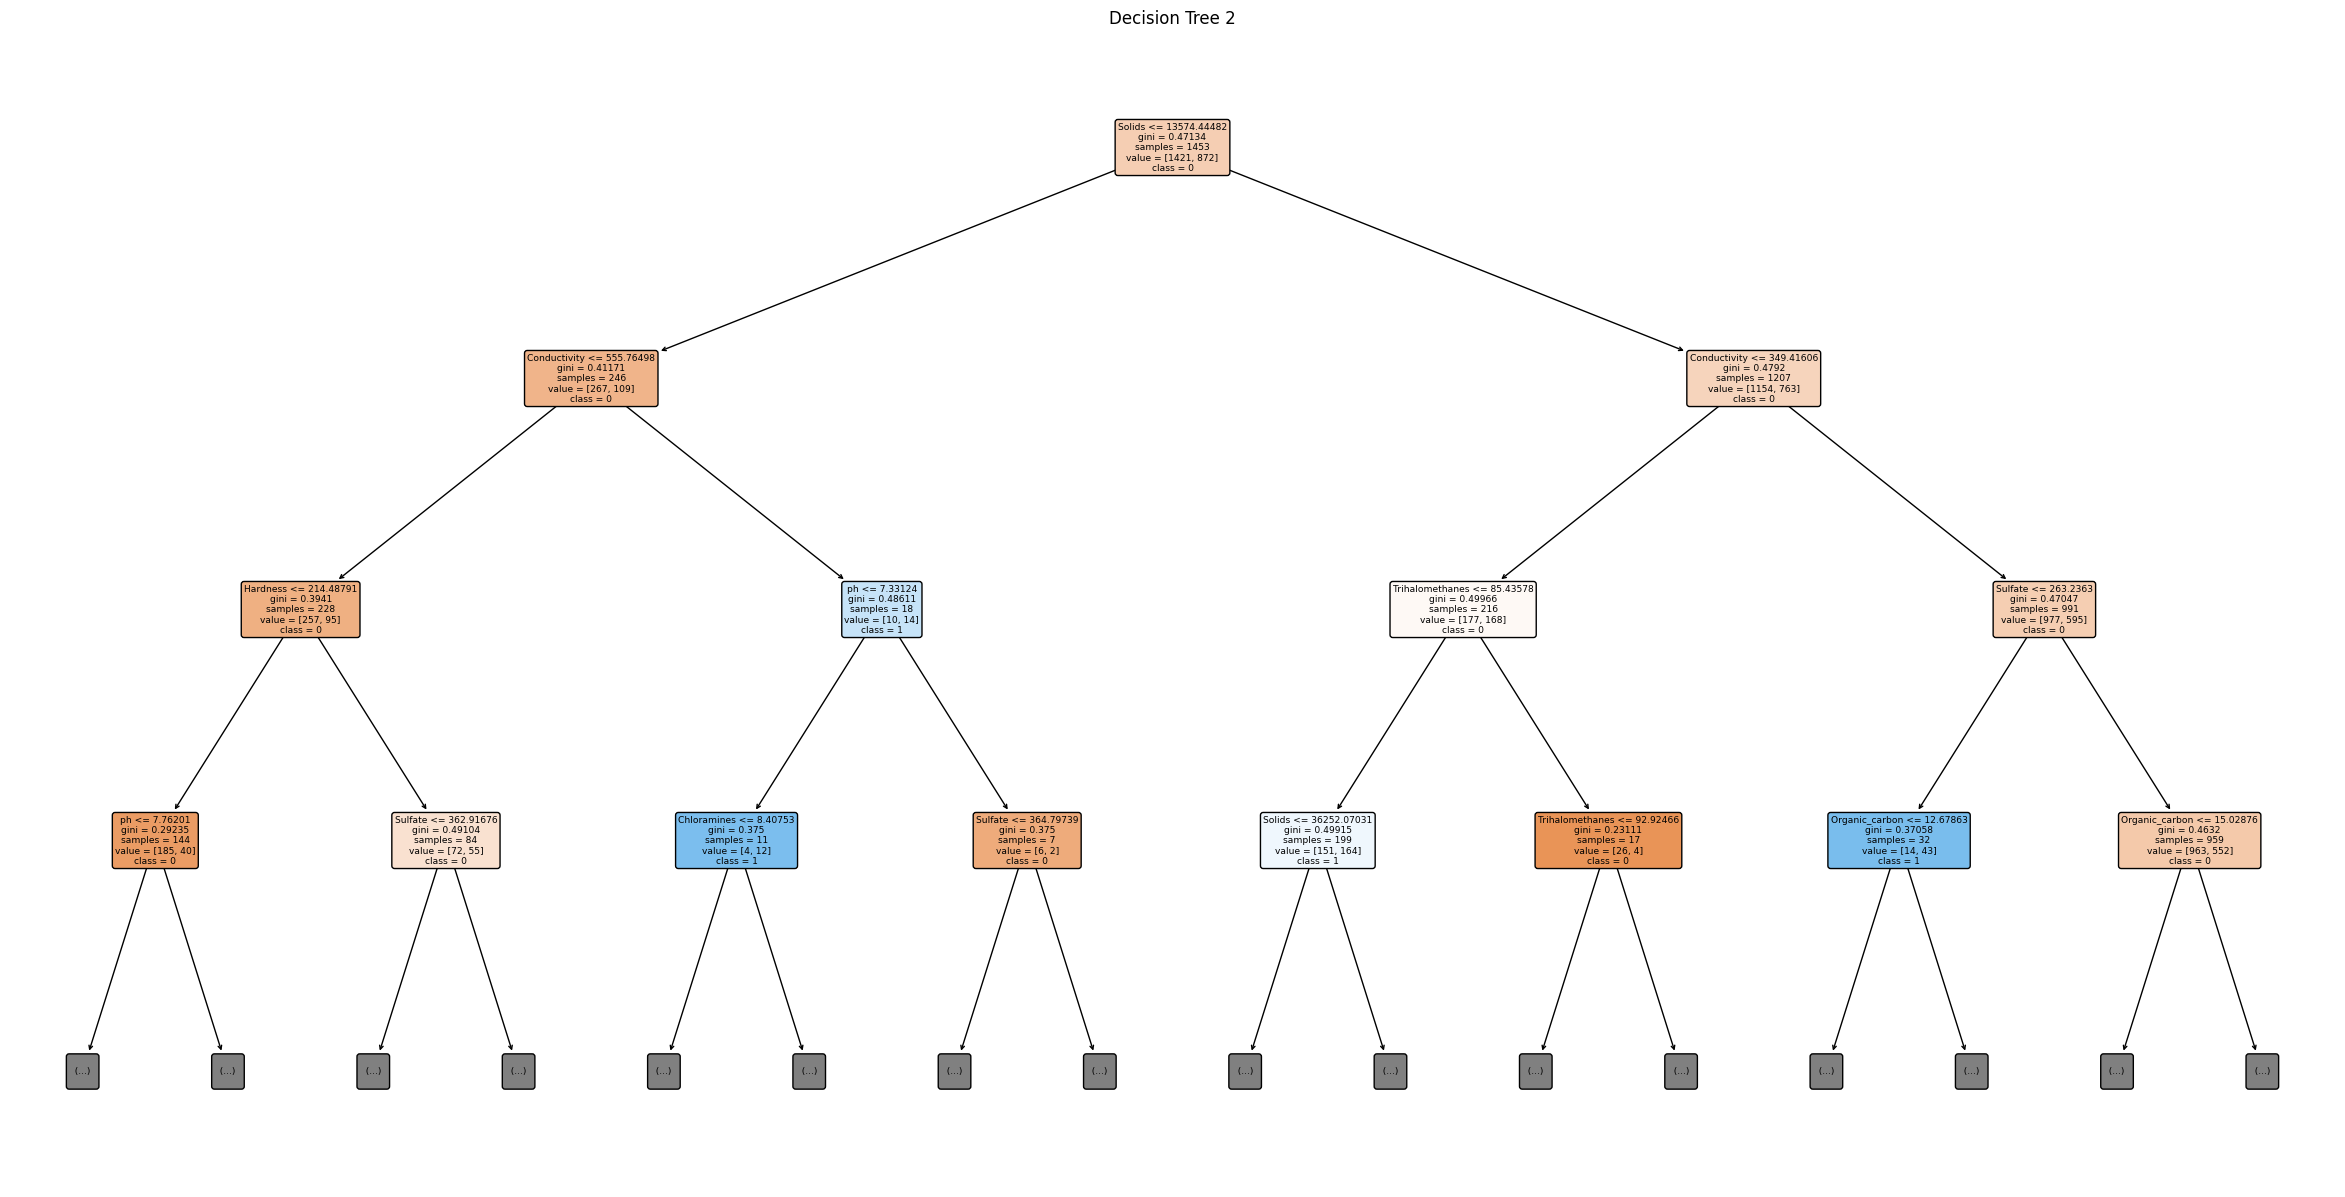

In [31]:
rf_clf = models[1][1]

# Calculate precision scores for all trees
bonus_scores = []

for estimator in rf_clf.estimators_:
    model_result = estimator.predict(X_test)
    score = precision_score(y_test, model_result)
    bonus_scores.append(score)

# Get indices of top 2 trees with highest precision scores
top_2_indices = np.argsort(bonus_scores)[-2:]

# Visualize the top 2 trees with precision scores
for i, index in enumerate(top_2_indices):
    plt.figure(figsize=(30, 15))

    tree.plot_tree(decision_tree=rf_clf.estimators_[index],
                   feature_names=df.columns.tolist()[:-1],
                   class_names=["0", "1"],
                   filled=True,
                   rounded=True,
                   precision=5,
                   max_depth=3)

    plt.title(f"Decision Tree {i+1}")
    plt.show()